In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [6]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

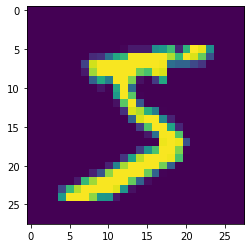

In [7]:
plt.imshow(some_digit_image)

In [8]:
y[0]

'5'

# 이진 분류기
- 이진분류? 맞냐 틀리냐? 두개로 나눈다. 
    - 이진분류를 반복하면 다중분류가 가능해 진다.
- 모델을 선택하여 훈련시킨다.
    - 확률적 경사하강법 : 학습 데이터의 단위를 배치라고 한다. 배치 사이즈가 1인 분류기. 한번에 하나씩 훈련샘플을 처리해서 학습
        - 퍼셉트론?????
        - LogisticRegression????
        - SVM???? 
```
from sklearn.linear_model import SGDClassifier

SGDClassifier(loss='perceptron') 
SGDClassifier(loss='log')
SGDClassifier(loss='hinge')#기본값 SVM

```

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
import numpy as np
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [31]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
model_sgd_clf = SGDClassifier(random_state = 42)

In [34]:
model_sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [45]:
model_sgd_clf.predict(X[2].reshape(1,-1))

array([False])

In [53]:
X[2].reshape(1,-1).shape

(1, 784)

# Set
Test(수능) vs Training(사설모의고사) vs Validation(퍙가원 모의고사)
- 모델을 검증하는 과정에서 Test Set을 사용한다. Test Set = Validation
- 문제점
    - Test Set 을 이용해 모델의 성능을 확인하고 -> 파라미터 수정 -> Test에서만 잘동작하는 모델이 생성된다.
    - Training -> Validation 보정 -> Test으로 평가
    - Training -> 9:1로 나눈다.
    - Test(수능)1 vs Training(사설모의고사)8 vs Validation(퍙가원 모의고사)1
    
- validation Set을 사용했을때 장점
    - 과적합 문제를 해결할수 있다. 
    - 검증세트를 통해 모델 선정 과정
        - Training SEt으로 MOdel 학습
        - 학습된 모델을 Validation Set으로 평가
        - Validation Set에 대한 결과로 모델 파라메타 조정
        - 가장 우수한 모델 선택
        - 그모델로 TEst Set 평가

# 교차 검증

- 단순교차 검증
    - from sklearn.model_selecion import cross_val_score
    - cross_val_score(모델객체, 훈련데이터, 타겟, cv = 폴드수)
- 계층별 K겹 교차검증
    - 편향된 데이터의 경우 단순교차 검증으로는 문제가 발생할수 있다. 
    - 계츨을 나누고 분할해서 뽑는다. 
    - from sklearn.model_selecion import StratifiedKFold
- 임의분할 교차검증
    - Train_size와 Test_size를 데이터의 갯수 또는 비율로 정할수 있다.
    - 4번 반복분할 25% 가 검증세트가 된다.
    - 10% 를 검증세트로 4번 반복분할 하여 학습시킬수 있다. 
    - sklearn.model_selection.ShuffleSplit()

In [ ]:
import sklearn.model_selection
sklearn.model_selection.cross_val_score(model_sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# 오차 행렬(confusion Matrix)
```
from sklearn.metrics import confusion_matrix
```

- 행 : 실제 Class (target)
- 열 : 예측 Class (predict)

- 정밀도
    - 모델이 T 라고 예측한것중에서 실제 T인것에 대한 비율
    - TP/ TP+FP
    - 맑다고 예측했는데 실제로 맑은 날의 비율
    
- 재현율
    - 실제 T 모델이 T라고 예측한것의 비율
    - TP/TP+FN
    - 실제 맑은날 중에 맑다고 예측한 비율
    
- 정밀도 vs 재현율
    - 실제 Postive인 데이터를 Negative 잘못 판단하면 안되는 경우는 재현율을 사용한다.
        - 인증, 악성코드, 병진단
        - 실제로 양성인데 음성으로 판단하면 -> 병???? 병을 키울수 있다.
    - 실제로 Negative인 데이터를 POstive 잘못판단하면 안되는 경우는 정밀도를 사용한다.
        - 스팸메일
        - 스펨메일이 아닌데 스펨메일로 판단하면 메일을 못받는다. 
- 정밀도는 낮아지고 재현율은 높아진다 -> 예측을 많이한다.(골결이 낮다. 호난사)
- 정밀도가 높아지고 재현율이 낮다. -> 신중하게 예측을 한다. (골결이 높다. 손날두)

- confidence Threshold 값에 따라서 정밀도와 재현율의 수치가 조정되고(서로 상보적), trad-off가 발생한다. 